# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


In [36]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [37]:
#loading data
df=pd.read_excel("f_train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [38]:
#the arival and departure time is in 24 hour format
#The duration is in hours and minutes, will convert in into minutes

In [39]:
#checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [40]:
#there are 1 null value in route and 1 in total_stops
#will drop these columns

In [41]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [42]:
#there are only one int type and rest are object type

# Data Preperation

In [43]:
#Converting the Date_of_journey into date, month.
df["Day"]=df["Date_of_Journey"].str.split("/").str[0]
df['month'] = df["Date_of_Journey"].str.split("/").str[1]
#changing it in int type
df["Day"]=df["Day"].astype(int)
df["month"]=df["month"].astype(int)

In [44]:
#removing date of journey
df=df.drop(['Date_of_Journey'],axis=1)

In [45]:
#craeting funtion to convert departure and arival time 
#This function takes the flight Departure time and convert into appropriate format.
def flight_dep_time(X):
    
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [46]:
#departure time
df['Departure_time'] = df['Dep_Time'].apply(flight_dep_time)

In [47]:
#arival time
df['arvl_time'] = df['Arrival_Time'].apply(flight_dep_time)

In [48]:
#making function to filter number of stops.
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non-stop':
        return 0

In [49]:
#applying on stops
df["Stops"]=df["Total_Stops"].apply(convert_into_stops)

In [50]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,month,Departure_time,arvl_time,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,evening,mid_night,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,mid_night,afternoon,2.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,morning,mid_night,2.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,evening,evening,1.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,afternoon,evening,1.0


In [52]:
#droping nullvalues
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
month              0
Departure_time     0
arvl_time          0
Stops              0
dtype: int64

In [54]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,month,Departure_time,arvl_time,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,evening,mid_night,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,mid_night,afternoon,2.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,morning,mid_night,2.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,evening,evening,1.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,afternoon,evening,1.0


In [55]:
#spliting duration in hours and minutes and converting them into int type
df["H"]=df["Duration"].str.split("h").str[0]
df["M"]=df["Duration"].str.split("h").str[1]
df["M"]=df["M"].str.split("m").str[0]
df["M"].fillna(0,inplace=True)
df.drop(df.index[df['H'] == '5m'], inplace = True)
df.replace(to_replace="", value='0', inplace=True)
df["H"]=df["H"].astype(int)
df["M"]=df["M"].astype(int)

In [56]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,month,Departure_time,arvl_time,Stops,H,M
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,evening,mid_night,0.0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,mid_night,afternoon,2.0,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,morning,mid_night,2.0,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,evening,evening,1.0,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,afternoon,evening,1.0,4,45


In [57]:
#adding hours and minutes to form time taken
df["Time_taken"]=df["H"]*60 + df["M"]
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,month,Departure_time,arvl_time,Stops,H,M,Time_taken
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,evening,mid_night,0.0,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,mid_night,afternoon,2.0,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,morning,mid_night,2.0,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,evening,evening,1.0,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,afternoon,evening,1.0,4,45,285


In [58]:
#checking for value counts of additonal values
df["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [59]:
#in approx all the columns there is no info,
#will drop the column

In [60]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)

In [61]:
cat

['Airline',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Departure_time',
 'arvl_time']

In [62]:
#EDA
#univariate analysis

<AxesSubplot:xlabel='Airline', ylabel='count'>

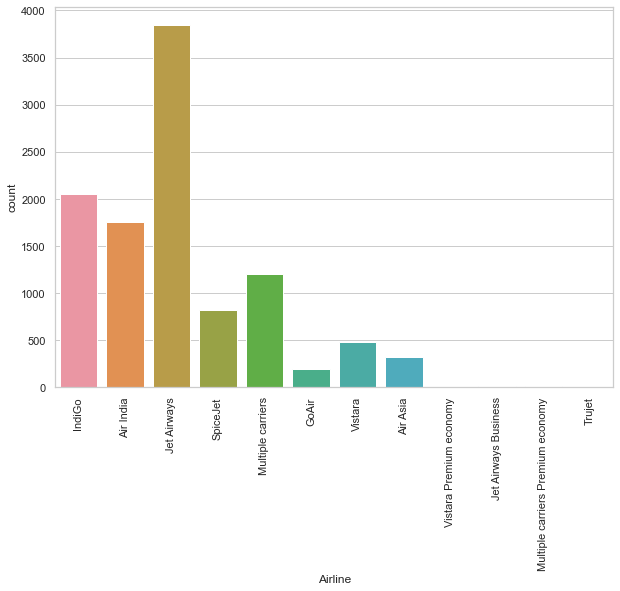

In [63]:
#Airline
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Airline", data=df)

In [64]:
#jet Airways carry maximum number of flight while
#Vistara premium economy, jet Airways buisness, multiple carriers premium ecconomy and Trujet carry least flight

<AxesSubplot:xlabel='Source', ylabel='count'>

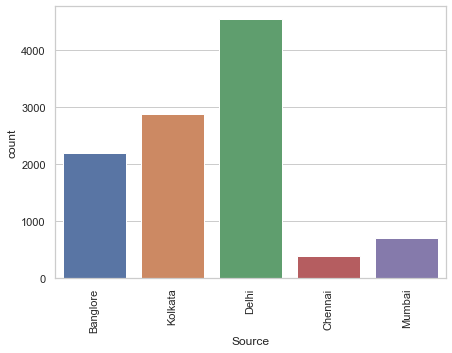

In [65]:
#Source
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot("Source", data=df)

In [66]:
#majority of the flight takeoff from delhi
#chennai sees least takeoff

<AxesSubplot:xlabel='Destination', ylabel='count'>

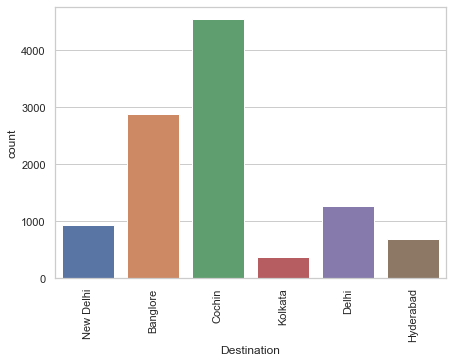

In [67]:
#Destination
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot("Destination", data=df)

In [68]:
#coaching recives maximum number of incoming flights 
#kolkata revieves least

<AxesSubplot:xlabel='Departure_time', ylabel='count'>

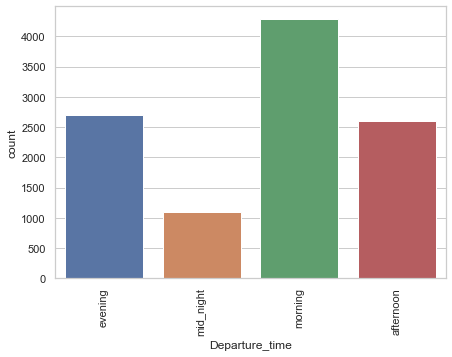

In [69]:
#Departure_time
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot("Departure_time", data=df)

In [70]:
#most of the flight take of in the moring 
#the takeoff is least in mid night

<AxesSubplot:xlabel='arvl_time', ylabel='count'>

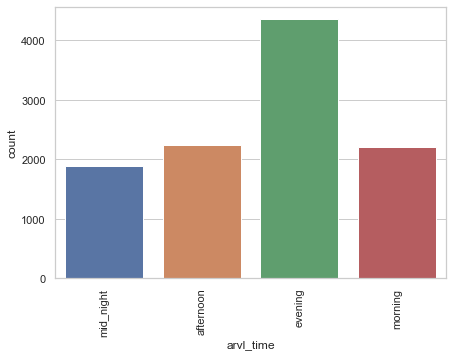

In [71]:
#Arival Time
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot("arvl_time", data=df)

In [72]:
#most flight touch down in the evening 

In [73]:
#extracting non-object type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)
ncat

['Price', 'Day', 'month', 'Stops', 'H', 'M', 'Time_taken']

In [74]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

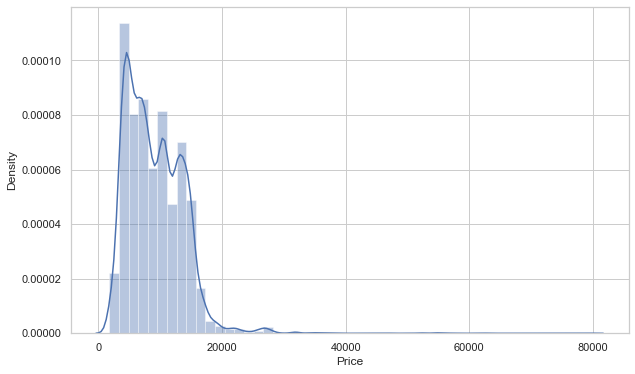

In [75]:
#Price
histogram(df,"Price")

In [76]:
#the price data is right skwed 
#there are some high prices

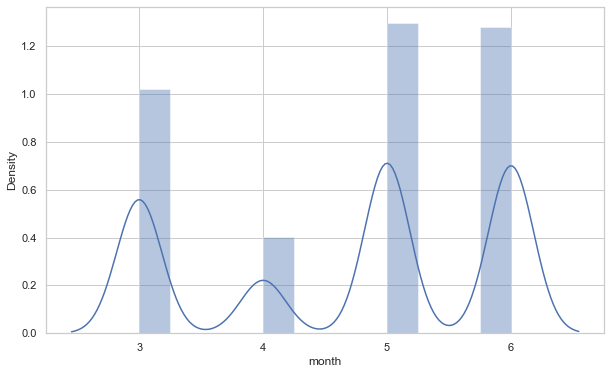

In [77]:
#month
histogram(df,"month")

In [78]:
#5th & 6th month sees maximum number of flights
#4th month sees least number of flight

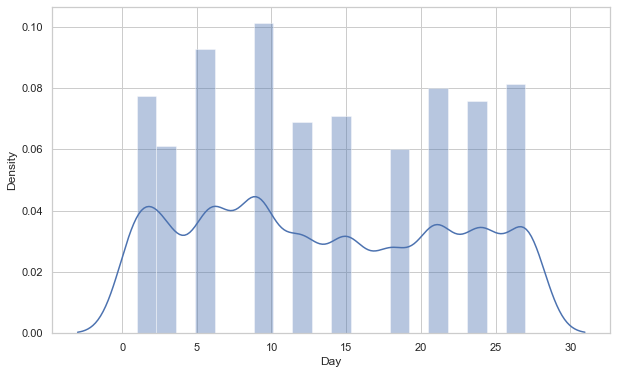

In [79]:
#Day
histogram(df,"Day")

In [80]:
#there mare many days on which no flight take place


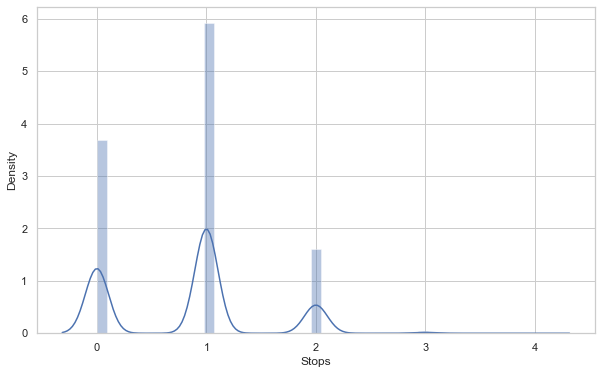

In [81]:
#Stops
histogram(df,"Stops")

In [82]:
#majority of the flight takes atleast one stop
#very few flight take stops more tan 2

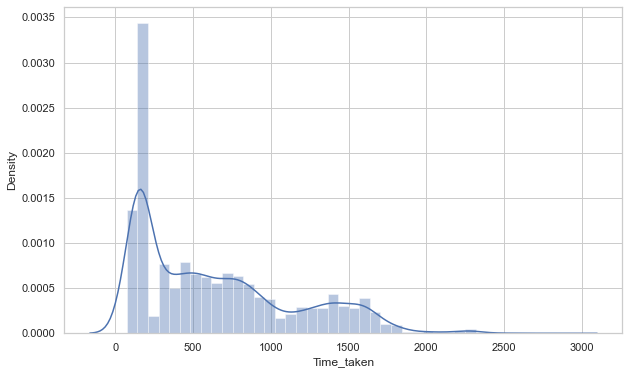

In [83]:
#Time_Taken
histogram(df,"Time_taken")

In [86]:
#the majority of the time taken is less than 250 minutes
#the data is right skwed

In [87]:
#Droping columns which is not neccesary
df.drop(['Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','H','M'],axis=1, inplace=True)

In [88]:
df

,Airline,Source,Destination,Price,Day,month,Departure_time,arvl_time,Stops,Time_taken
0,IndiGo,Banglore,New Delhi,3897,24,3,evening,mid_night,0.0,170
1,Air India,Kolkata,Banglore,7662,1,5,mid_night,afternoon,2.0,445
2,Jet Airways,Delhi,Cochin,13882,9,6,morning,mid_night,2.0,1140
3,IndiGo,Kolkata,Banglore,6218,12,5,evening,evening,1.0,325
4,IndiGo,Banglore,New Delhi,13302,1,3,afternoon,evening,1.0,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,9,4,evening,evening,0.0,150
10679,Air India,Kolkata,Banglore,4145,27,4,evening,evening,0.0,155
10680,Jet Airways,Banglore,Delhi,7229,27,4,morning,morning,0.0,180
10681,Vistara,Banglore,New Delhi,12648,1,3,morning,afternoon,0.0,160


In [89]:
#bivariate analysis


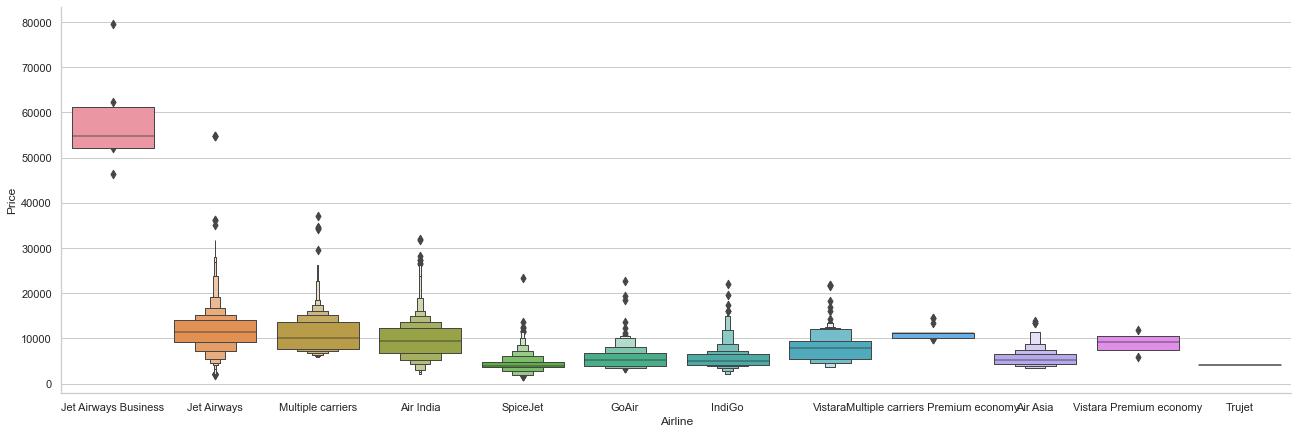

In [90]:
#airline/price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [91]:
#though the flights of jetairways buisness is low, there prices are the highest among the other airlines
#trujet has the lowest price in all


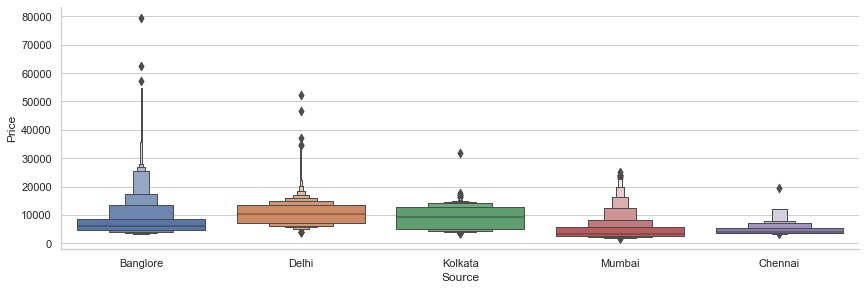

In [92]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [93]:
#the plane which take offs from banglore has highest fare
#the place which take offs from chennai has lowest fare 

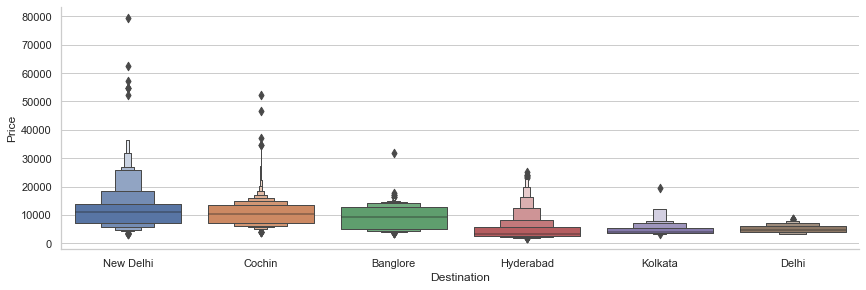

In [94]:
# Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [95]:
#the plane which touch down in the new delhi has more fare in comparison of others
#while place which touch down in delhi has least

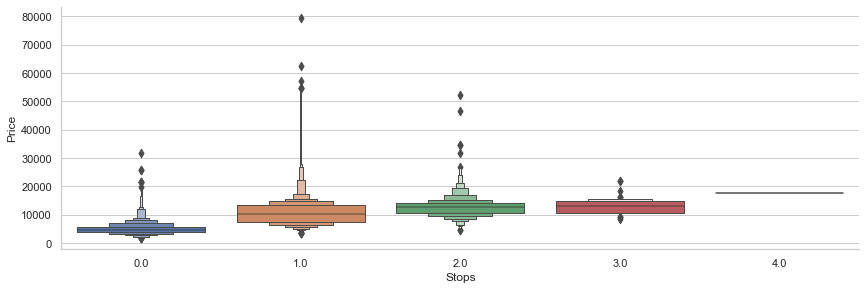

In [96]:
# stops vs Price
sns.catplot(y = "Price", x = "Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [97]:
#the more number of stops during the fligts adds more in the price

Text(0, 0.5, 'Price of ticket')

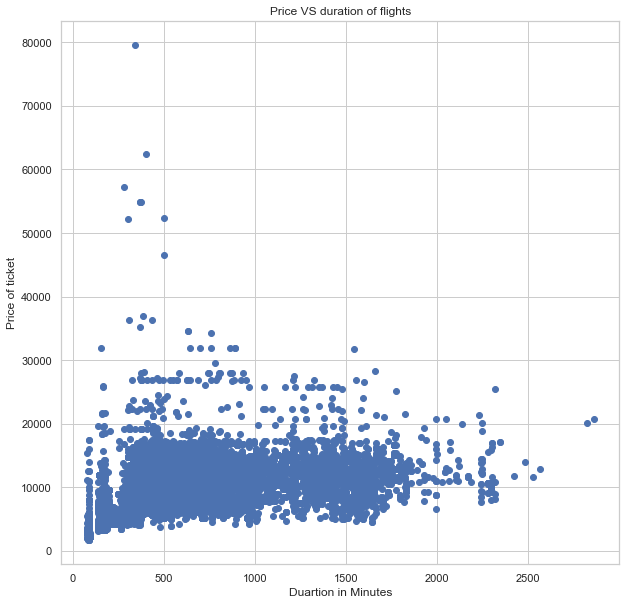

In [98]:
#price/duration
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(x='Time_taken', y='Price',data=df)
plt.xlabel('Duartion in Minutes')
plt.ylabel('Price of ticket')

In [99]:
#there is a slight increase in price with the increase of the durration

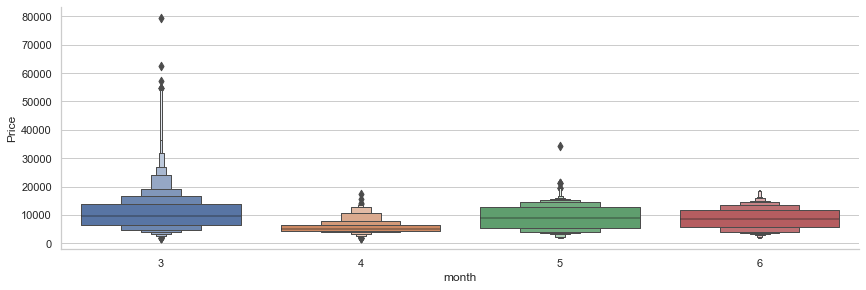

In [100]:
# month vs Price

sns.catplot(y = "Price", x = "month", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [101]:
#the third month sees maximum price in comparioson of other month
#Also the 3rd moth contains few premium prices in the 3rd month.


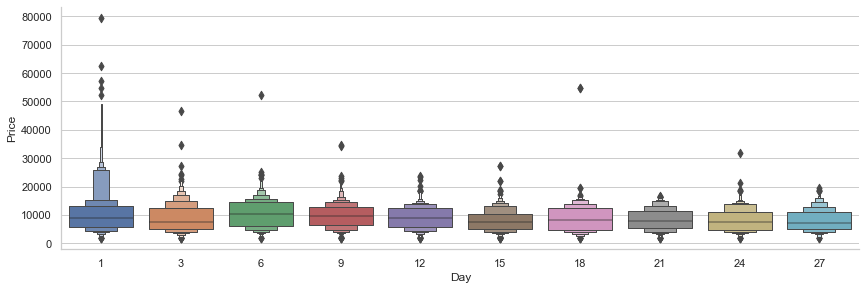

In [102]:
# Days vs Price

sns.catplot(y = "Price", x = "Day", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [103]:
#prices are more in the beigning of the month

In [104]:
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Airline"]=encoder.fit_transform(df['Airline'])
df["Source"]=encoder.fit_transform(df['Source'])
df["Destination"]=encoder.fit_transform(df['Destination'])
df["Departure_time"]=encoder.fit_transform(df['Departure_time'])
df["arvl_time"]=encoder.fit_transform(df['arvl_time'])


In [105]:
df.head()

,Airline,Source,Destination,Price,Day,month,Departure_time,arvl_time,Stops,Time_taken
0,3,0,5,3897,24,3,1,2,0.0,170
1,1,3,0,7662,1,5,2,0,2.0,445
2,4,2,1,13882,9,6,3,2,2.0,1140
3,3,3,0,6218,12,5,1,1,1.0,325
4,3,0,5,13302,1,3,0,1,1.0,285


<AxesSubplot:>

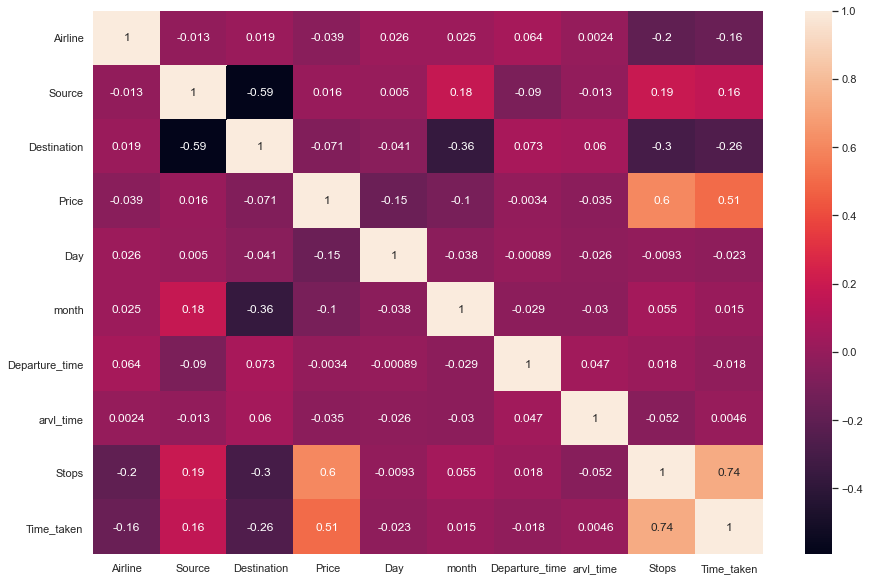

In [106]:
#checcking correlation
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [107]:
#price is highly correlated with time taken and stops
#price is lossely realated with departure time

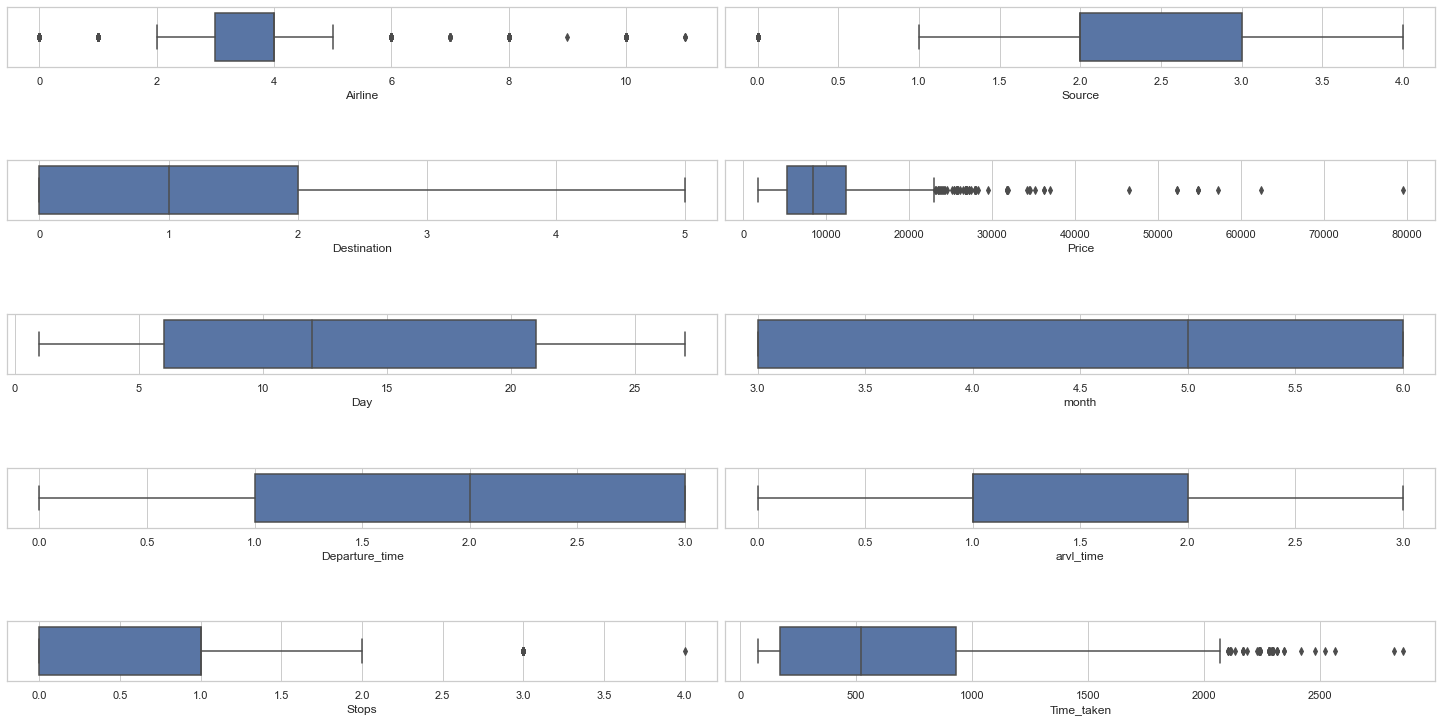

In [108]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=2,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [109]:
#there are outliers in time taken, price

In [110]:
from scipy.stats import  zscore
z=np.abs(zscore(df))
d1=df[(z<3).all(axis=1)]
d1

,Airline,Source,Destination,Price,Day,month,Departure_time,arvl_time,Stops,Time_taken
0,3,0,5,3897,24,3,1,2,0.0,170
1,1,3,0,7662,1,5,2,0,2.0,445
2,4,2,1,13882,9,6,3,2,2.0,1140
3,3,3,0,6218,12,5,1,1,1.0,325
4,3,0,5,13302,1,3,0,1,1.0,285
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4107,9,4,1,1,0.0,150
10679,1,3,0,4145,27,4,1,1,0.0,155
10680,4,0,2,7229,27,4,3,3,0.0,180
10681,10,0,5,12648,1,3,3,0,0.0,160


In [111]:
d1.skew()

Airline           0.730209
Source           -0.436720
Destination       1.262819
Price             0.415814
Day               0.107305
month            -0.417655
Departure_time   -0.109689
arvl_time         0.311696
Stops             0.229827
Time_taken        0.778518
dtype: float64

In [112]:
#spliting data in x and y
x=d1.drop("Price", axis=1)
x

,Airline,Source,Destination,Day,month,Departure_time,arvl_time,Stops,Time_taken
0,3,0,5,24,3,1,2,0.0,170
1,1,3,0,1,5,2,0,2.0,445
2,4,2,1,9,6,3,2,2.0,1140
3,3,3,0,12,5,1,1,1.0,325
4,3,0,5,1,3,0,1,1.0,285
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,9,4,1,1,0.0,150
10679,1,3,0,27,4,1,1,0.0,155
10680,4,0,2,27,4,3,3,0.0,180
10681,10,0,5,1,3,3,0,0.0,160


In [113]:
y=d1["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10487, dtype: int64

In [114]:
# treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

Airline          -0.013700
Source           -0.236680
Destination       0.041208
Day              -0.203891
month            -0.223735
Departure_time   -0.206510
arvl_time        -0.067130
Stops            -0.070805
Time_taken       -0.046258
dtype: float64

In [115]:
x=df_new

In [116]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [117]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7340, 9), (7340,), (3147, 9), (3147,))

In [118]:
#creating function 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
    print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
    print("""r2 score is:
    
    """,r2_score(y_test,predict))
    
    print("cross_val_score", cross_val_score(model,x,y,cv=5).mean())

In [119]:
#LineraRegression
model(LinearRegression)

mean squared error is:
     7866754.864490505
The mean absolute error is:  2203.699289526514
r2 score is:
    
     0.521758893584532
cross_val_score 0.5297209705971906


In [120]:
#decisiontreeregressor
model(DecisionTreeRegressor)

mean squared error is:
     5203008.4104818525
The mean absolute error is:  1388.9123027221692
r2 score is:
    
     0.6836951777727751
cross_val_score 0.6875153877580448


In [121]:
#randomforestregressor
model(RandomForestRegressor)

mean squared error is:
     3540878.648994606
The mean absolute error is:  1236.807850861995
r2 score is:
    
     0.7847404994883158
cross_val_score 0.7920724289436558


In [122]:
#extratreesreressor
model(ExtraTreesRegressor)

mean squared error is:
     4419761.477716043
The mean absolute error is:  1343.0565280614946
r2 score is:
    
     0.7313108574494421
cross_val_score 0.730246392986645


In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [124]:
model(KNeighborsRegressor)

mean squared error is:
     4659550.037724817
The mean absolute error is:  1537.9581823959325
r2 score is:
    
     0.7167334683964282
cross_val_score 0.7191846163091752


In [125]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
#BaggingRegressor
model(BaggingRegressor)

mean squared error is:
     3676799.853251789
The mean absolute error is:  1250.9980819608852
r2 score is:
    
     0.7764774852938996
cross_val_score 0.7809611764736996


In [127]:
#AdaBoostRegressor
model(AdaBoostRegressor)

mean squared error is:
     6620413.183858249
The mean absolute error is:  2144.0808576135414
r2 score is:
    
     0.5975273438012514
cross_val_score 0.6399225815659293


In [128]:
#GradientBoostingRegressor
model(GradientBoostingRegressor)

mean squared error is:
     3799610.2135237497
The mean absolute error is:  1455.8828161518109
r2 score is:
    
     0.7690115144345739
cross_val_score 0.7715849883537175


In [129]:
#RandomForestregressor is the best model as the RMSLE is maxium
#setting parameters for hyperparameter tunning
parameter={
          "criterion":["mse","mae"],
          'max_features':['auto', 'sqrt',"log2"],
          'min_samples_split':[2, 5, 10, 15],
           'min_samples_leaf':[1, 2, 5, 10]}

In [131]:
#using GridSearchCV for Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [132]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]})

In [133]:
#checking best parameters
gcv.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [140]:
model=RandomForestRegressor(criterion="mse",max_features="auto",min_samples_leaf=1,min_samples_split=10)
model.fit(x_train,y_train)
pred=model.predict(x_test)
    
print("""mean squared error is:
    """,mean_squared_error(y_test, pred))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,pred))
    
    
print("r2 score is:" ,r2_score(y_test,pred))

mean squared error is:
     3012143.573601064
The mean absolute error is:  1187.4102519959522
r2 score is: 0.8168837214156016


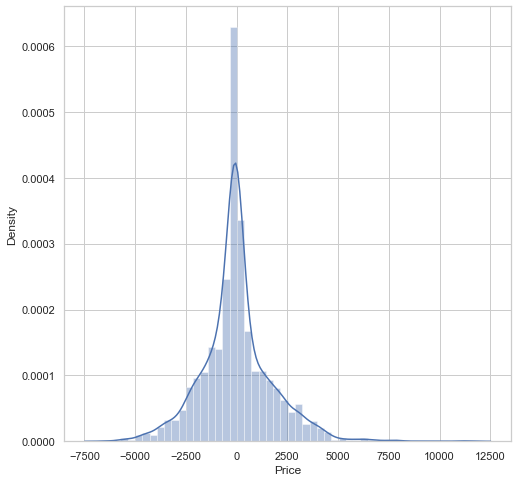

In [141]:
#plotting model distplot
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred)
plt.show()

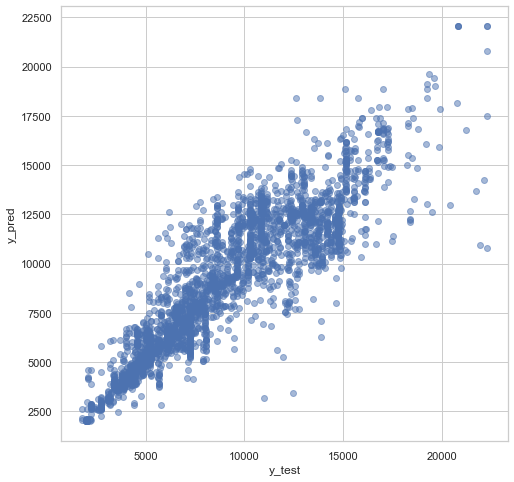

In [142]:
#ploting model accuracy scatterplot
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [143]:
#test data

In [145]:
#loading data
df=pd.read_excel("Test_set.xlsx")
#Converting the Date_of_journey into date, month.
#Converting the Date_of_journey into date, month.
df["Day"]=df["Date_of_Journey"].str.split("/").str[0]
df['month'] = df["Date_of_Journey"].str.split("/").str[1]
#changing it in int type
df["Day"]=df["Day"].astype(int)
df["month"]=df["month"].astype(int)

#craeting funtion to convert departure and arival time 
#This function takes the flight Departure time and convert into appropriate format.
def flight_dep_time(X):
    
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'
#departure time
df['Departure_time'] = df['Dep_Time'].apply(flight_dep_time)
#arival time
df['arvl_time'] = df['Arrival_Time'].apply(flight_dep_time)
#making function to filter number of stops.
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non-stop':
        return 0
#applying on stops
df["Stops"]=df["Total_Stops"].apply(convert_into_stops)
#droping nullvalues
df.dropna(inplace=True)
#spliting duration in hours and minutes and converting them into int type
df["H"]=df["Duration"].str.split("h").str[0]
df["M"]=df["Duration"].str.split("h").str[1]
df["M"]=df["M"].str.split("m").str[0]
df["M"].fillna(0,inplace=True)
df.drop(df.index[df['H'] == '5m'], inplace = True)
df.replace(to_replace="", value='0', inplace=True)
df["H"]=df["H"].astype(int)
df["M"]=df["M"].astype(int)
#adding hours and minutes to form time taken
df["Time_taken"]=df["H"]*60 + df["M"]
#Droping columns which is not neccesary
df.drop(["Date_of_Journey",'Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','H','M'],axis=1, inplace=True)
# from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Airline"]=encoder.fit_transform(df['Airline'])
df["Source"]=encoder.fit_transform(df['Source'])
df["Destination"]=encoder.fit_transform(df['Destination'])
df["Departure_time"]=encoder.fit_transform(df['Departure_time'])
df["arvl_time"]=encoder.fit_transform(df['arvl_time'])

#removing outliers
from scipy.stats import  zscore
z=np.abs(zscore(df))
d1=df[(z<3).all(axis=1)]

# treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(d1)
df_new=pd.DataFrame(df_new,columns=d1.columns)
#prediction
fare=model.predict(df_new)
fare

array([13044.46252178,  4251.49581251, 14197.98077749, ...,
       18392.19984383, 11972.61688776,  9440.35776125])